<center> <h1 style="background-color:seagreen; color:white" > <br>Análise e Visualização dos Dados das Interrupções de Energia Elétrica nas Redes de Distribuição do ano de 2023<br></h1></center> 

<center> <h2 style="background-color: #868661; color:white"> <br> <strong>teste</strong> <br> </h2></center>


Dados de todas as interrupções de energia elétrica ocorridas nas redes de distribuição de energia elétrica do país no ano de 2023. Não constam as interrupções ocorridas em áreas sob gestão de permissionárias de serviço público (cooperativas).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./interrupcoes-energia-eletrica-2023.csv", sep=';', encoding='ISO-8859-1', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9148815 entries, 0 to 9148814
Data columns (total 17 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DatGeracaoConjuntoDados        object
 1   DscConjuntoUnidadeConsumidora  object
 2   DscAlimentadorSubestacao       object
 3   DscSubestacaoDistribuicao      object
 4   NumOrdemInterrupcao            object
 5   DscTipoInterrupcao             object
 6   IdeMotivoInterrupcao           int64 
 7   DatInicioInterrupcao           object
 8   DatFimInterrupcao              object
 9   DscFatoGeradorInterrupcao      object
 10  NumNivelTensao                 int64 
 11  NumUnidadeConsumidora          int64 
 12  NumConsumidorConjunto          int64 
 13  NumAno                         int64 
 14  NomAgenteRegulado              object
 15  SigAgente                      object
 16  NumCPFCNPJ                     int64 
dtypes: int64(6), object(11)
memory usage: 1.2+ GB


In [4]:
df.head()

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2024-02-10,TAQUARI,01C7,TAQ,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,49861,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2024-02-10,São Francisco,01I2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
3,2024-02-10,Tangará,01I8,TAN,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 01:57:58,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,71279,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
4,2024-02-10,Tangará,01C1,TRA,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 01:57:58,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,71279,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170


In [5]:
df["DatInicioInterrupcao"] = pd.to_datetime(df["DatInicioInterrupcao"])
df["DatFimInterrupcao"] = pd.to_datetime(df["DatFimInterrupcao"])
df.head(3)

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2024-02-10,TAQUARI,01C7,TAQ,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,49861,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2024-02-10,São Francisco,01I2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170


In [6]:
df["DscTipoInterrupcao"].unique()

array(['Não Programada', 'Programada'], dtype=object)

In [7]:
df["duracao"] = df["DatFimInterrupcao"] - df["DatInicioInterrupcao"]
df["duracao"].head(2)

0   0 days 02:08:26
1   0 days 02:08:26
Name: duracao, dtype: timedelta64[ns]

In [50]:
df["duracao"]

0         0 days 02:08:26
1         0 days 02:08:26
2         0 days 02:08:26
3         0 days 01:41:24
4         0 days 01:41:24
                ...      
9148810   0 days 00:34:19
9148811   0 days 00:08:00
9148812   0 days 00:08:00
9148813   0 days 03:10:07
9148814   0 days 03:49:47
Name: duracao, Length: 9148815, dtype: timedelta64[ns]

In [8]:
df["NomAgenteRegulado"].unique()

array(['ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A',
       'COMPANHIA DE ELETRICIDADE DO AMAPÁ',
       'ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.',
       'EQUATORIAL MARANHÃO DISTRIBUIDORA DE ENERGIA S.A',
       'EQUATORIAL PIAUÍ DISTRIBUIDORA DE ENERGIA S.A',
       'COMPANHIA ENERGÉTICA DO CEARÁ',
       'COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE COSERN',
       'COMPANHIA ENERGÉTICA DE PERNAMBUCO',
       'EQUATORIAL ALAGOAS DISTRIBUIDORA DE ENERGIA S.A.',
       'COMPANHIA SUL SERGIPANA DE ELETRICIDADE',
       'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA COELBA',
       'DME DISTRIBUIÇÃO S.A. - DMED',
       'COMPANHIA PAULISTA DE FORÇA E LUZ',
       'COMPANHIA JAGUARI DE ENERGIA',
       'COMPANHIA CAMPOLARGUENSE DE ENERGIA COCEL',
       'FORÇA E LUZ CORONEL VIVIDA LTDA',
       'EMPRESA FORÇA E LUZ DE URUSSANGA LTDA',
       'DCELT - DISTRIBUIDORA CATARINENSE DE ENERGIA ELÉTRICA LTDA',
       'EMPRESA FORÇA E LUZ JOÃO CESA LTDA',
       'Departamento Municipal 

<center> <h4 style="background-color:DarkKhaki; color:white" > <br>Total de interrupções por Agente Regulado <br></h4></center> 

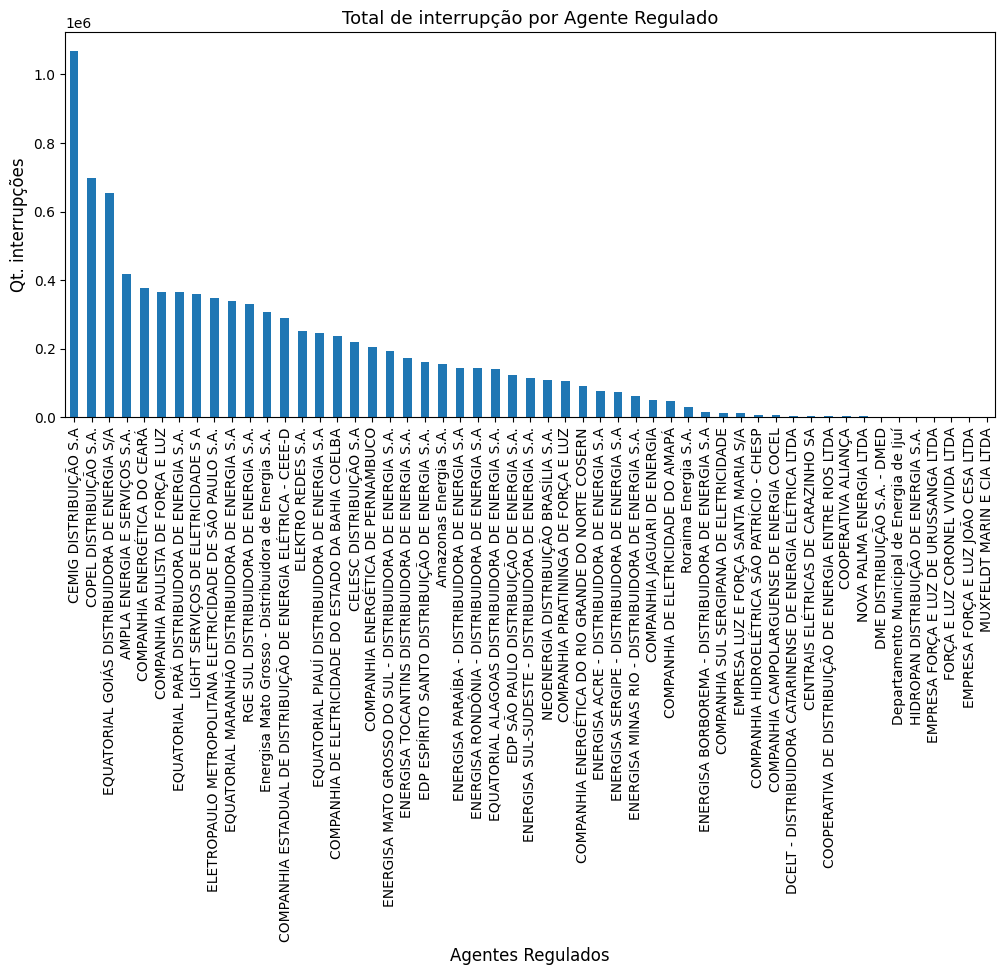

In [16]:
plt.figure(figsize=(12, 5))
ax = df.groupby(by="NomAgenteRegulado")["SigAgente"].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Total de interrupção por Agente Regulado", fontsize=13);
plt.xlabel("Agentes Regulados", fontsize=12)
plt.ylabel("Qt. interrupções", fontsize=12)
plt.show()

O gráfico abaixo mostra os 5 Agentes Regulados que mais tiveram interrupções de energia no ano de 2023.

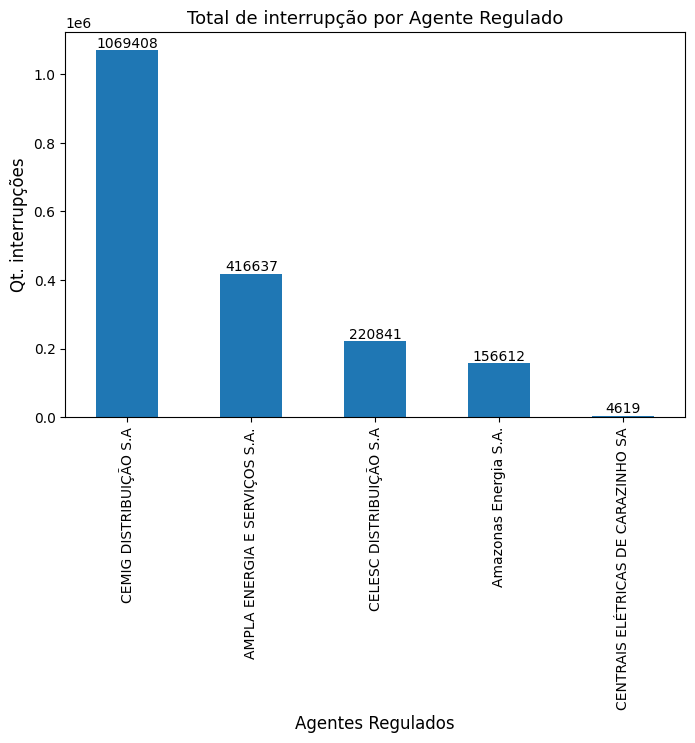

In [29]:
plt.figure(figsize=(8, 5))
ax = df.groupby(by="NomAgenteRegulado")["SigAgente"].count()[0:5].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt="%.0f")
plt.title("Total de interrupção por Agente Regulado", fontsize=13);
plt.xlabel("Agentes Regulados", fontsize=12)
plt.ylabel("Qt. interrupções", fontsize=12)
plt.show()

<center> <h4 style="background-color:DarkKhaki; color:white" > <br>Total de horas de interrupções por Agente Regulado <br></h4></center> 

In [30]:
df.head(1)

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ,duracao
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,0 days 02:08:26


In [81]:
df["duracao"][1]

Timedelta('0 days 02:08:26')

In [92]:
df["duracao"].apply(lambda x: ((x.total_seconds()/60)/60)/24)

0          0.089190
1          0.089190
2          0.089190
3          0.070417
4          0.070417
             ...   
9148810    0.023831
9148811    0.005556
9148812    0.005556
9148813    0.132025
9148814    0.159572
Name: duracao, Length: 9148815, dtype: float64

In [95]:
df["duracao_dias"] = df["duracao"].apply(lambda x: ((x.total_seconds()/60)/60)/24)
df.head(2)

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ,duracao,duracao_dias
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,0 days 02:08:26,0.08919
1,2024-02-10,TAQUARI,01C7,TAQ,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,49861,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,0 days 02:08:26,0.08919


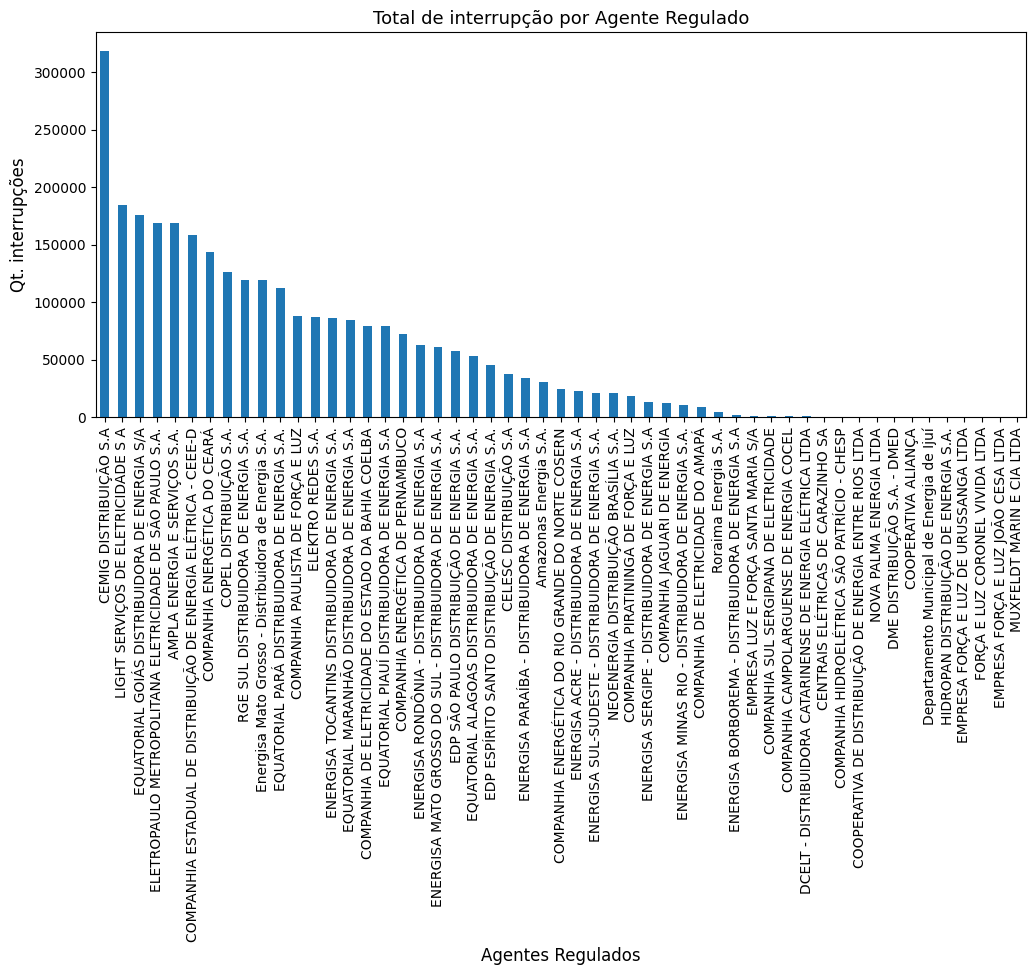

In [96]:
plt.figure(figsize=(12, 5))
ax = df.groupby(by="NomAgenteRegulado")["duracao_dias"].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Total de interrupção por Agente Regulado", fontsize=13);
plt.xlabel("Agentes Regulados", fontsize=12)
plt.ylabel("Qt. interrupções", fontsize=12)
plt.show()

In [ ]:
df_equatorial_para = df[df["NomAgenteRegulado"]== 'EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.']
df_equatorial_para

In [ ]:
df_equatorial_para["DscConjuntoUnidadeConsumidora"].unique()

In [ ]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ I"]["NumNivelTensao"].unique()

In [ ]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ I"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()

In [ ]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ II"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()

In [ ]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ CENTRO"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()